In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

In [3]:
# Step 2: Load and Preprocess Dataset
df = pd.read_csv('Admission_Predict.csv')
df.columns = df.columns.str.strip()  # Remove extra spaces

In [4]:
# Drop Serial No.
df.drop('Serial No.', axis=1, inplace=True)


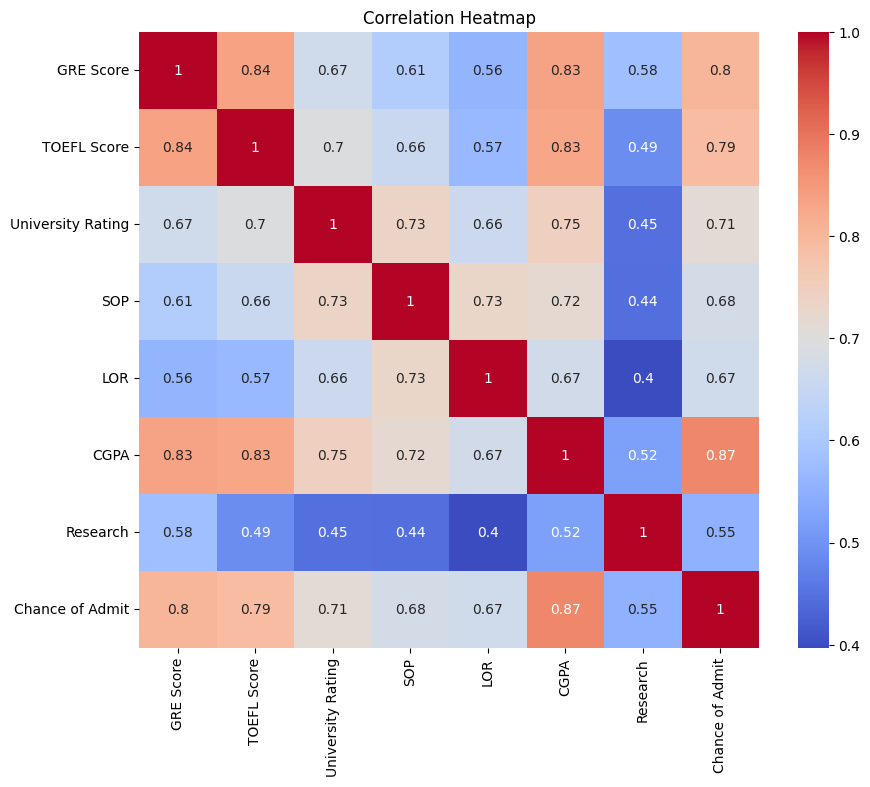

In [5]:
# Step 3: EDA
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

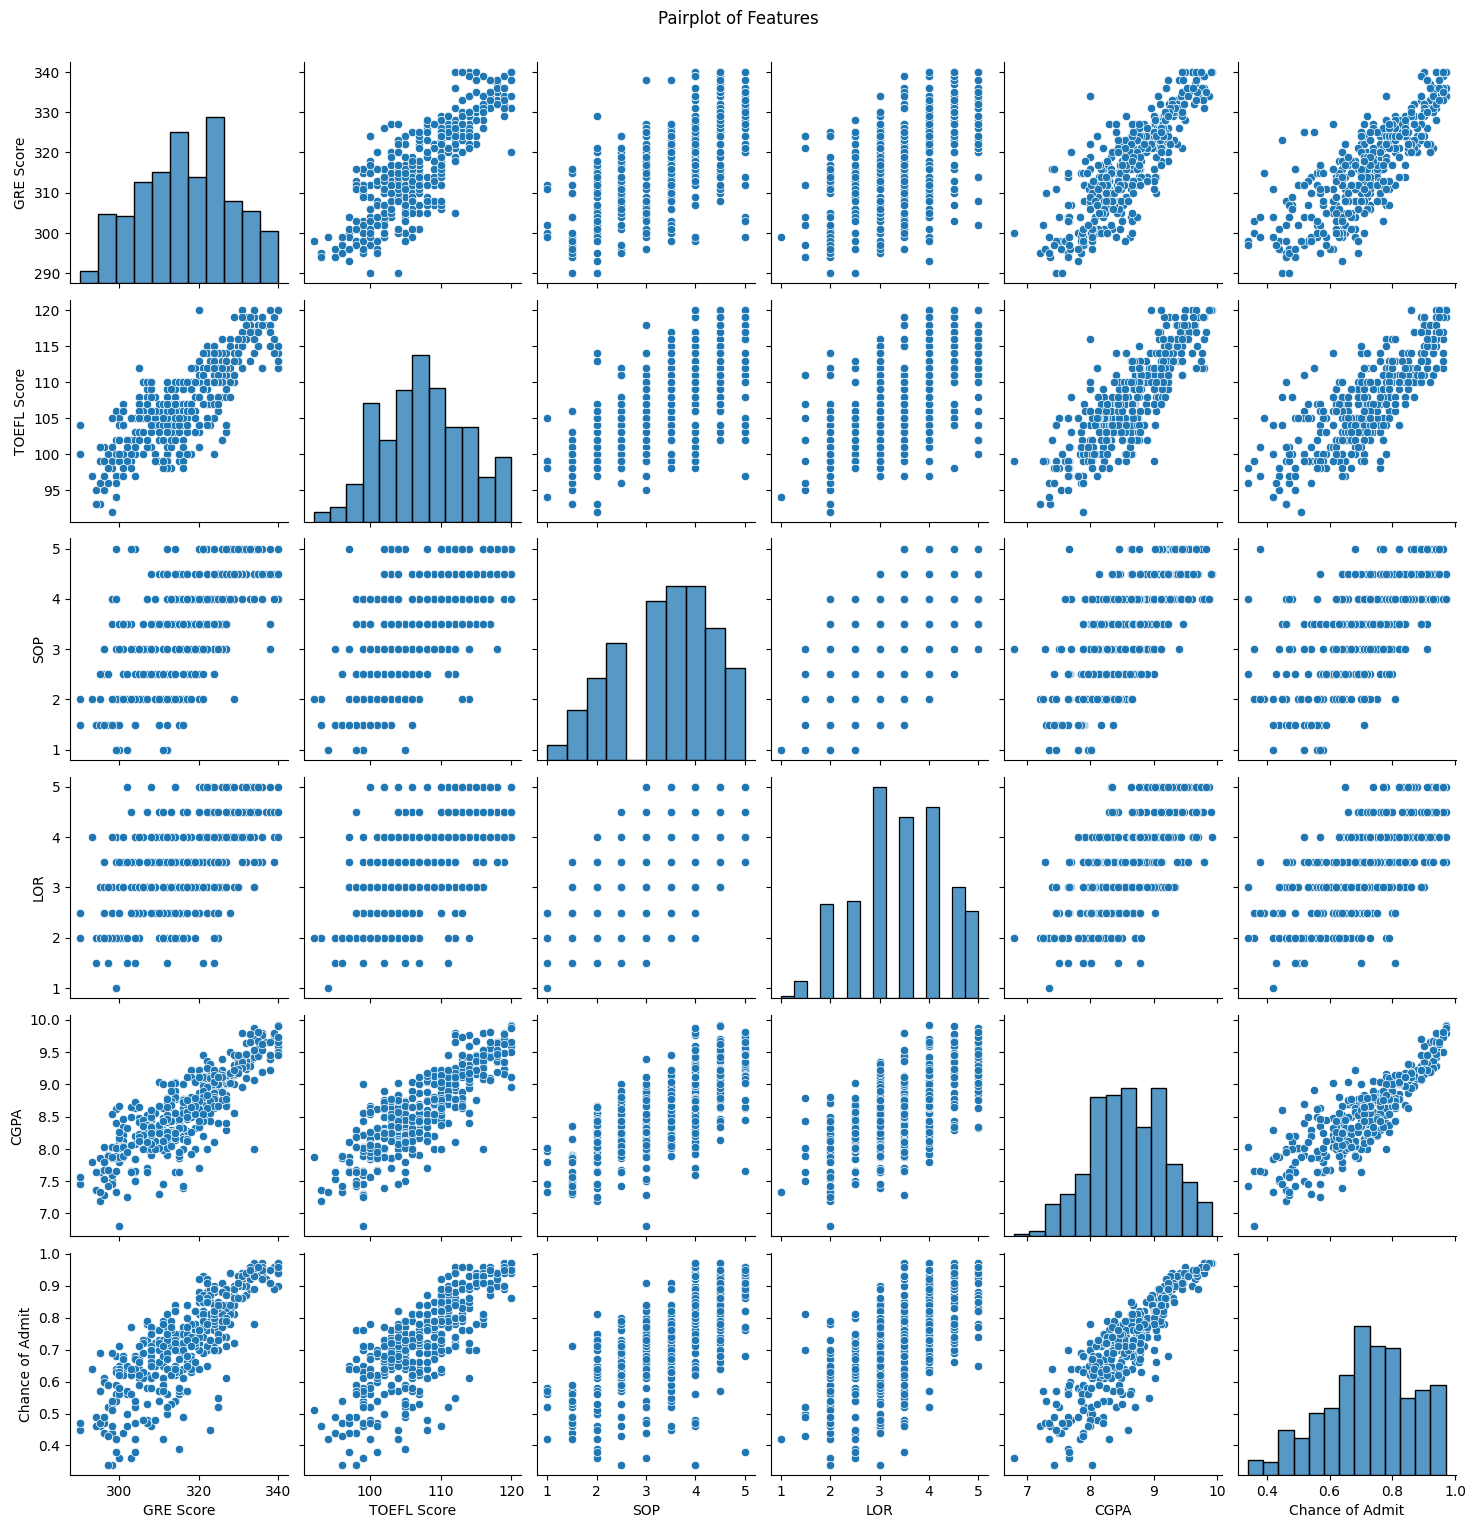

In [6]:
sns.pairplot(df, vars=['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit'])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()


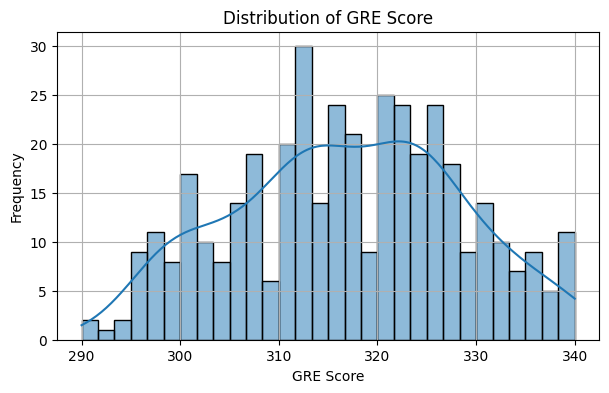

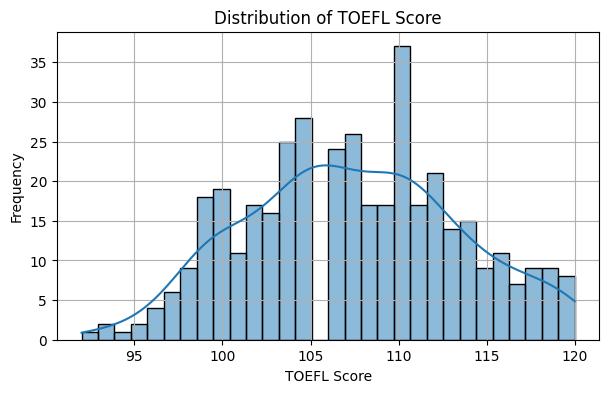

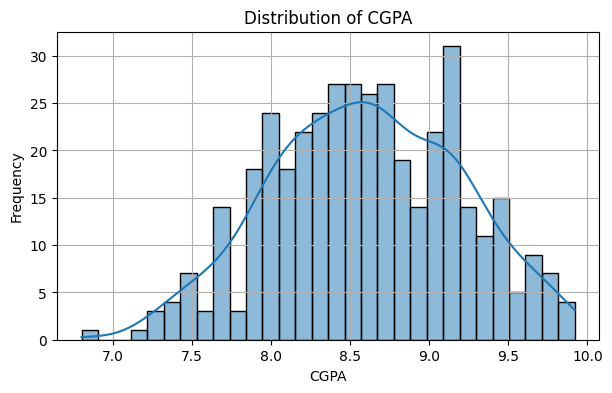

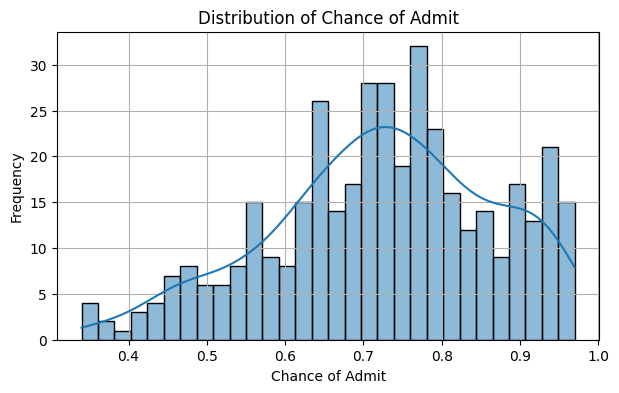

In [7]:
# Distribution of key features
features_to_plot = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
for feature in features_to_plot:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [8]:
# Step 4: Feature Selection
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
target = 'Chance of Admit'

X = df[features]
y = df[target]

In [9]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Train a model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Predictions
y_pred = model.predict(X_test)


In [12]:
# Evaluation
print("\nModel Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Model Performance:
R2 Score: 0.8212082591486991
RMSE: 0.06794853476922819


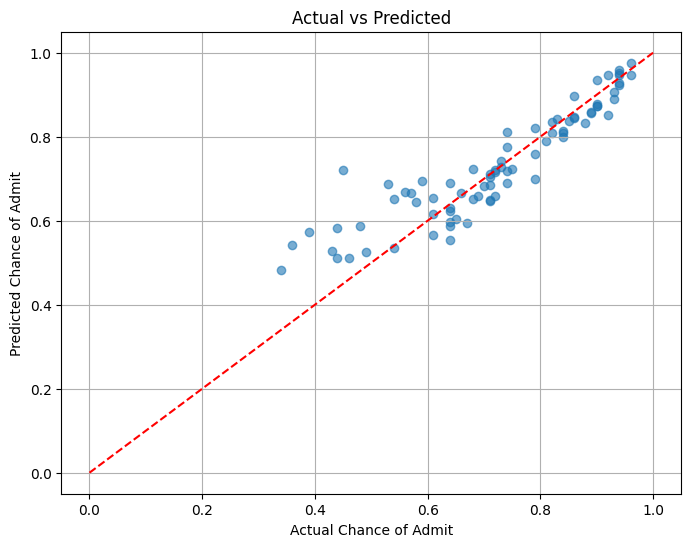

In [13]:
# Step 6: Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("Predicted Chance of Admit")
plt.title("Actual vs Predicted")
plt.plot([0,1],[0,1],'r--')
plt.grid(True)
plt.show()


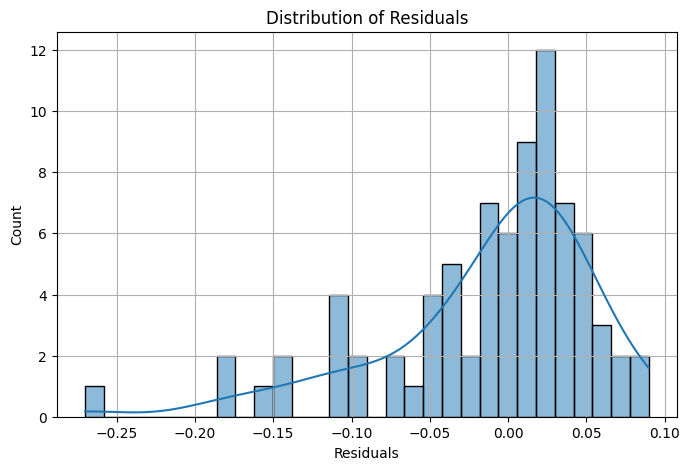

In [14]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

In [15]:
# Step 7: Interactive Input
print("\nEnter applicant's data to predict admission chance:")
gre = float(input("GRE Score: "))
toefl = float(input("TOEFL Score: "))
rating = float(input("University Rating (1-5): "))
sop = float(input("SOP Strength (1-5): "))
lor = float(input("LOR Strength (1-5): "))
cgpa = float(input("CGPA (out of 10): "))
research = int(input("Research Experience (0 or 1): "))


Enter applicant's data to predict admission chance:


GRE Score:  310
TOEFL Score:  110
University Rating (1-5):  4
SOP Strength (1-5):  4
LOR Strength (1-5):  4
CGPA (out of 10):  8.3
Research Experience (0 or 1):  1


In [16]:
# import pandas as pd

# # Assuming these variables are defined: gre, toefl, rating, sop, lor, cgpa, research
# applicant_data = pd.DataFrame([[gre, toefl, rating, sop, lor, cgpa, research]], columns=features)

# # Predict the admission chance
# predicted_chance = model.predict(applicant_data)[0]

# # Display the prediction
# print(f"\nPredicted Chance of Admission: {predicted_chance:.2f}")

# # Decision logic
# if predicted_chance >= 0.75:
#     print("Result: Yes, likely to be admitted.")
# else:
#     print("Result: No, not likely to be admitted.")


In [17]:
# correlation_matrix = df.corr()
# correlation_with_target = correlation_matrix['Chance of Admit'].drop('Chance of Admit')
# correlation_sorted = correlation_with_target.sort_values(ascending=False)
# print("Features affecting 'Chance of Admit' (from most to least):\n")
# print(correlation_sorted)


In [18]:
# applicant_data = pd.DataFrame([[gre, toefl, rating, sop, lor, cgpa, research]], columns=features)
# predicted_chance = model.predict(applicant_data)[0]
# print(f"\nPredicted Chance of Admission: {predicted_chance:.2f}")

# averages = df[features].mean()
# input_data = pd.Series([gre, toefl, rating, sop, lor, cgpa, research], index=features)
# below_average = input_data[input_data < averages]

# if not below_average.empty:
#     print("\nTo improve your admission chances, consider focusing on:")
#     for feature in below_average.index:
#         print(f"- {feature} (Your value: {input_data[feature]}, Average: {averages[feature]:.2f})")
# else:
#     print("\nAll your scores are above average! Focus on refining your application further.")


In [19]:
applicant_data = pd.DataFrame([[gre, toefl, rating, sop, lor, cgpa, research]], columns=features)
predicted_chance = model.predict(applicant_data)[0]
print(f"\nPredicted Chance of Admission: {predicted_chance:.2f}")

averages = df[features].mean()
input_data = pd.Series([gre, toefl, rating, sop, lor, cgpa, research], index=features)

suggestions = {
    'GRE Score': 'Consider retaking the GRE to improve your score.',
    'TOEFL Score': 'Improving your TOEFL score can strengthen your language proficiency profile.',
    'University Rating': 'Aim for higher-rated universities or build a stronger profile to qualify.',
    'SOP': 'Work on making your Statement of Purpose more compelling and focused.',
    'LOR': 'Request stronger Letters of Recommendation from influential or academic mentors.',
    'CGPA': 'If possible, improve your academic grades or highlight academic excellence in your SOP.',
    'Research': 'Engage in research projects or publish papers to add credibility to your application.'
}

print("\nFeature-wise Feedback:\n")
for feature in features:
    if input_data[feature] >= averages[feature]:
        print(f"- {feature}: Your {feature} is appropriate.")
    else:
        print(f"- {feature}: Your {feature} could be improved: {suggestions[feature]}")



Predicted Chance of Admission: 0.71

Feature-wise Feedback:

- GRE Score: Your GRE Score could be improved: Consider retaking the GRE to improve your score.
- TOEFL Score: Your TOEFL Score is appropriate.
- University Rating: Your University Rating is appropriate.
- SOP: Your SOP is appropriate.
- LOR: Your LOR is appropriate.
- CGPA: Your CGPA could be improved: If possible, improve your academic grades or highlight academic excellence in your SOP.
- Research: Your Research is appropriate.


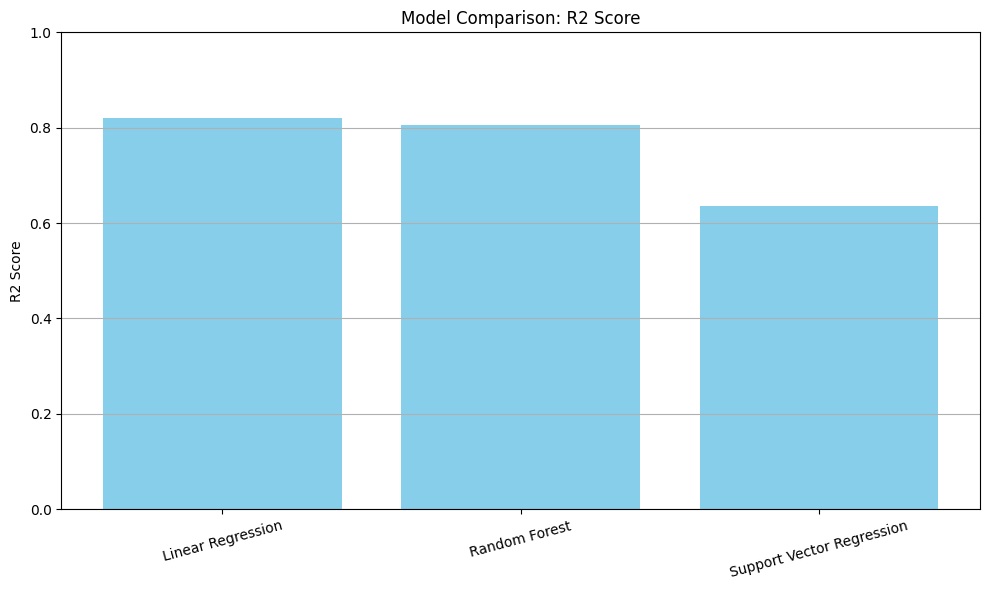

                       Model  R2 Score      RMSE
0          Linear Regression  0.821208  0.067949
1              Random Forest  0.806608  0.070669
2  Support Vector Regression  0.634801  0.097112


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Admission_Predict.csv")
df.columns = df.columns.str.strip()
df.drop("Serial No.", axis=1, inplace=True)

features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
X = df[features]
y = df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))

results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE"])
results_df.sort_values(by="R2 Score", ascending=False, inplace=True)

plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["R2 Score"], color="skyblue")
plt.title("Model Comparison: R2 Score")
plt.ylabel("R2 Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print(results_df)


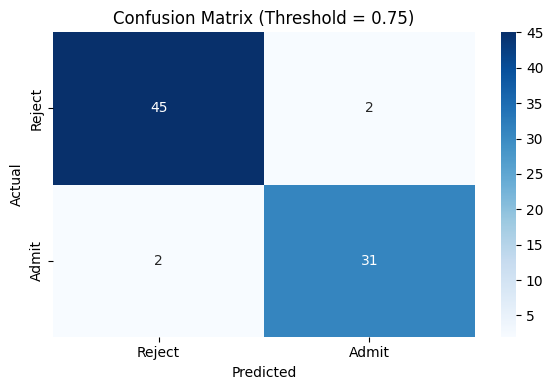

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert regression outputs to binary classification
threshold = 0.75
y_pred_continuous = model.predict(X_test)
y_pred_class = [1 if prob >= threshold else 0 for prob in y_pred_continuous]
y_test_class = [1 if actual >= threshold else 0 for actual in y_test]

# Confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
labels = ["Reject", "Admit"]

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.75)")
plt.tight_layout()
plt.show()


In [22]:
# import pickle

# # assuming `model` is your trained regression/classification model
# with open('admission_model.pkl', 'wb') as f:
#     pickle.dump(model, f)


In [23]:
import joblib

# Save model to file
joblib.dump(model, 'admission_model.pkl')


['admission_model.pkl']